In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

originalMilestone = pd.read_excel('Milestone Sheet 2019 complete v01_edited.xlsx')

In [2]:
originalMilestone

GMAN Airline GMAN Turnaround Type AODB| DEP Flight Number  \
0              BAW                 BOTH                  BA3271   
1              BAW                 BOTH                  BA4451   
2              LGL                 BOTH                  LG4592   
3              KLM                 BOTH                   KL982   
4              DLH                 BOTH                   LH927   
...            ...                  ...                     ...   
27306          SWR                 BOTH                   LX447   
27307          KLM                 BOTH                   KL992   
27308          EIN                 BOTH                   EI291   
27309          KLM                 BOTH                   KL998   
27310          KLM                 BOTH                   KL980   

      GMAN Aircraft Type MASTER_CALENDAR Month GMAN Scheduled In-Block Time  \
0                   E170                   Apr          2019-04-01 06:55:00   
1                   E190                   Apr          2019-04-01 07:00:00   
2                   DH8D                   Apr          2019-04-01 07:05:00   
3                   E190                   Apr          2019-04-01 07:15:00   
4                   E190                   Apr          2019-04-01 07:15:00   
...                  ...                   ...                          ...   
27306               BCS1                   Dec          2019-12-31 17:50:00   
27307               E190                   Dec          2019-12-31 18:25:00   
27308               RJ85                   Dec          2019-12-31 19:30:00   
27309               E190                   Dec          2019-12-31 19:35:00   
27310               E190                   Dec          2019-12-31 20:15:00   

      GMAN Estimated In-Block Time GMAN Actual In-Block Time  \
0              2019-04-01 06:38:00       2019-04-01 06:44:00   
1              2019-04-01 06:46:00       2019-04-01 06:51:00   
2              2019-04-01 06:57:00       2019-04-01 07:01:00   
3              2019-04-01 07:03:00       2019-04-01 07:06:00   
4              2019-04-01 07:06:00       2019-04-01 07:11:00   
...                            ...                       ...   
27306          2019-12-31 17:29:00       2019-12-31 17:35:00   
27307          2019-12-31 18:01:00       2019-12-31 18:06:00   
27308          2019-12-31 19:02:00       2019-12-31 19:08:00   
27309          2019-12-31 19:13:00       2019-12-31 19:18:00   
27310          2019-12-31 20:03:00       2019-12-31 20:08:00   

      GMAN Scheduled Off-Block Time GMAN Estimated Off-Block Time  ...  Year  \
0               2019-04-01 07:30:00           2019-04-01 08:00:00  ...  2019   
1               2019-04-01 07:35:00           2019-04-01 07:35:00  ...  2019   
2               2019-04-01 07:35:00           2019-04-01 07:40:00  ...  2019   
3               2019-04-01 07:45:00           2019-04-01 07:45:00  ...  2019   
4               2019-04-01 07:50:00           2019-04-01 07:50:00  ...  2019   
...                             ...                           ...  ...   ...   
27306           2019-12-31 18:25:00           2019-12-31 18:25:00  ...  2019   
27307           2019-12-31 18:55:00           2019-12-31 18:55:00  ...  2019   
27308           2019-12-31 20:00:00           2019-12-31 20:00:00  ...  2019   
27309           2019-12-31 20:05:00           2019-12-31 20:05:00  ...  2019   
27310           2019-12-31 20:45:00           2019-12-31 20:45:00  ...  2019   

      Unnamed: 96 Unnamed: 97 Unnamed: 98 Unnamed: 99 2019-03-30 23:00:00  \
0             NaN         NaN         NaN         NaN 2019-10-26 22:59:00   
1             NaN         NaN         NaN         NaN                 NaT   
2             NaN         NaN         NaN         NaN                 NaT   
3             NaN         NaN         NaN         NaN                 NaT   
4             NaN         NaN         NaN         NaN                 NaT   
...           ...         ...         ...         ...       

In [3]:
#data preprocessing
origiTimeMilestone = originalMilestone[['GMAN Airline', 'GMAN Aircraft Type', 'Schedule Turn','Arrival Delay','AODB| DEP Flight Type','TOBT Accuracy',
                                        'Accuracy within +/-5min','First Pax Off','Last Pax Off','First Bag Off',
                                        'Last Bag Off','Catering Start','Catering Stop','Cleaning Start',
                                        'Cleaning Stop','Fuelling Start','Fuelling Stop','First Bag On',
                                        'Last Bag On','First Pax On','Last Pax On','AOBT']]

timeMilestone = origiTimeMilestone.fillna(0)

timeMilestone = timeMilestone.drop(timeMilestone[(timeMilestone['AOBT']<=20.0)|(timeMilestone['AOBT']>60.0)].index)
timeMilestone



GMAN Airline GMAN Aircraft Type  Schedule Turn  Arrival Delay  \
1              BAW               E190             35           -9.0   
2              LGL               DH8D             30           -4.0   
3              KLM               E190             30           -9.0   
4              DLH               E190             35           -4.0   
5              BAW               E170             35            7.0   
...            ...                ...            ...            ...   
27306          SWR               BCS1             35          -15.0   
27307          KLM               E190             30          -19.0   
27308          EIN               RJ85             30          -22.0   
27309          KLM               E190             30          -17.0   
27310          KLM               E190             30           -7.0   

      AODB| DEP Flight Type  TOBT Accuracy  Accuracy within +/-5min  \
1                         J       1.000000                      1.0   
2                         J       6.433333                      0.0   
3                         J      -2.666667                      1.0   
4                         J      -0.616667                      1.0   
5                         J      -3.000000                      1.0   
...                     ...            ...                      ...   
27306                     J      12.183333                      0.0   
27307                     J      18.000000                      0.0   
27308                     J      31.733333                      0.0   
27309                     J      22.000000                      0.0   
27310                     J      16.000000                      0.0   

       First Pax Off  Last Pax Off  First Bag Off  ...  Catering Stop  \
1               14.0          15.0           11.0  ...           21.0   
2               12.0          13.0           11.0  ...            0.0   
3                7.0          11.0            7.0  ...            0.0   
4                3.0           7.0            6.0  ...            0.0   
5                5.0           8.0            0.0  ...           15.0   
...              ...           ...            ...  ...            ...   
27306            4.0           9.0            0.0  ...            0.0   
27307            6.0           9.0            5.0  ...            0.0   
27308            2.0           9.0            0.0  ...            0.0   
27309            3.0          10.0            0.0  ...            0.0   
27310            4.0           6.0            5.0  ...            0.0   

       Cleaning Start  Cleaning Stop  Fuelling Start  Fuelling Stop  \
1                15.0           21.0            15.0           21.0   
2                14.0           16.0             0.0            0.0   
3                 0.0           16.0             0.0            0.0   
4                 0.0            0.0             0.0            0.0   
5                 8.0           14.0             0.0            0.0   
...               ...            ...             ...            ...   
27306            11.0           20.0            11.0           18.0   
27307             0.0           19.0             0.0            0.0   
27308             0.0            0.0             0.0            0.0   
27309             0.0            0.0             0.0            9.0   
27310             0.0           10.0             0.0            0.0   

       First Bag On  Last Bag On  First Pax On  Last Pax On  AOBT  
1              14.0         27.0          24.0         34.0  43.0  
2              15.0         28.0          19.0         27.0  36.0  
3               0.0         24.0          22.0         38.0  43.0  
4              12.0          0.0          19.0          0.0  41.0  
5               0.0         22.0          19.0         22.0  34.0  
...             ...          ...           ...          ...   ...  
27306          15.0         17.0          20.0         30.0  41.0  
27307          19.0       

In [4]:
#data preprocessing


#cal subprocess mean (or median)

firstPaxOffMean=timeMilestone['First Pax Off'].mean()
lastPaxOffMean=timeMilestone['Last Pax Off'][timeMilestone['Last Pax Off']!=0].mean()
firstBagOffMean=timeMilestone['First Bag Off'][timeMilestone['First Bag Off']!=0].mean()
lastBagOffMean=timeMilestone['Last Bag Off'][timeMilestone['Last Bag Off']!=0].mean()
cateringStartMean=timeMilestone['Catering Start'][timeMilestone['Catering Start']!=0].mean()
cateringStopMean=timeMilestone['Catering Stop'][timeMilestone['Catering Stop']!=0].mean()
cleaningStartMean=timeMilestone['Cleaning Start'][timeMilestone['Cleaning Start']!=0].mean()
cleaningStopMean=timeMilestone['Cleaning Stop'][timeMilestone['Cleaning Stop']!=0].mean()
fuellingStartMean=timeMilestone['Fuelling Start'][timeMilestone['Fuelling Start']!=0].mean()
fuellingStopMean=timeMilestone['Fuelling Stop'][timeMilestone['Fuelling Stop']!=0].mean()
firstBagOnMean=timeMilestone['First Bag On'][timeMilestone['First Bag On']!=0].mean()
lastBagOnMean=timeMilestone['Last Bag On'][timeMilestone['Last Bag On']!=0].mean()
firstPaxOnMean=timeMilestone['First Pax On'][timeMilestone['First Pax On']!=0].mean()
lastPaxOnMean=timeMilestone['Last Pax On'][timeMilestone['Last Pax On']!=0].mean()


#replace the 0 with mean value, because raw data has too much loss recording
timeMilestone = timeMilestone.replace({'First Pax Off':{0.0:firstPaxOffMean}})
timeMilestone = timeMilestone.replace({'Last Pax Off':{0.0:lastPaxOffMean}})
timeMilestone = timeMilestone.replace({'First Bag Off':{0.0:firstBagOffMean}})
timeMilestone = timeMilestone.replace({'Last Bag Off':{0.0:lastBagOffMean}})
timeMilestone = timeMilestone.replace({'Catering Start':{0.0:cateringStartMean}})
timeMilestone = timeMilestone.replace({'Catering Stop':{0.0:cateringStopMean}})
timeMilestone = timeMilestone.replace({'Cleaning Start':{0.0:cleaningStartMean}})
timeMilestone = timeMilestone.replace({'Cleaning Stop':{0.0:cleaningStopMean}})
timeMilestone = timeMilestone.replace({'Fuelling Start':{0.0:fuellingStartMean}})
timeMilestone = timeMilestone.replace({'Fuelling Stop':{0.0:fuellingStopMean}})
timeMilestone = timeMilestone.replace({'First Bag On':{0.0:firstBagOnMean}})
timeMilestone = timeMilestone.replace({'Last Bag On':{0.0:lastBagOnMean}})
timeMilestone = timeMilestone.replace({'First Pax On':{0.0:firstPaxOnMean}})
timeMilestone = timeMilestone.replace({'Last Pax On':{0.0:lastPaxOnMean}})


AOBT = timeMilestone[['AOBT']]

timeMilestoneRest = timeMilestone.drop(['GMAN Airline','GMAN Aircraft Type','AODB| DEP Flight Type','AOBT','Accuracy within +/-5min', 'TOBT Accuracy'],axis =1)

timeMilestoneRest


Schedule Turn  Arrival Delay  First Pax Off  Last Pax Off  \
1                 35           -9.0           14.0          15.0   
2                 30           -4.0           12.0          13.0   
3                 30           -9.0            7.0          11.0   
4                 35           -4.0            3.0           7.0   
5                 35            7.0            5.0           8.0   
...              ...            ...            ...           ...   
27306             35          -15.0            4.0           9.0   
27307             30          -19.0            6.0           9.0   
27308             30          -22.0            2.0           9.0   
27309             30          -17.0            3.0          10.0   
27310             30           -7.0            4.0           6.0   

       First Bag Off  Last Bag Off  Catering Start  Catering Stop  \
1          11.000000     15.000000       15.000000       21.00000   
2          11.000000     14.000000        9.432402       18.21399   
3           7.000000     15.000000        9.432402       18.21399   
4           6.000000     12.000000        9.432402       18.21399   
5           6.704024     11.389857        8.000000       15.00000   
...              ...           ...             ...            ...   
27306       6.704024     11.389857        9.432402       18.21399   
27307       5.000000      9.000000        9.432402       18.21399   
27308       6.704024     11.389857        9.432402       18.21399   
27309       6.704024     11.389857        9.432402       18.21399   
27310       5.000000      9.000000        9.432402       18.21399   

       Cleaning Start  Cleaning Stop  Fuelling Start  Fuelling Stop  \
1           15.000000      21.000000       15.000000      21.000000   
2           14.000000      16.000000        9.972305      18.760495   
3            9.915576      16.000000        9.972305      18.760495   
4            9.915576      18.202014        9.972305      18.760495   
5            8.000000      14.000000        9.972305      18.760495   
...               ...            ...             ...            ...   
27306       11.000000      20.000000       11.000000      18.000000   
27307        9.915576      19.000000        9.972305      18.760495   
27308        9.915576      18.202014        9.972305      18.760495   
27309        9.915576      18.202014        9.972305       9.000000   
27310        9.915576      10.000000        9.972305      18.760495   

       First Bag On  Last Bag On  First Pax On  Last Pax On  
1         14.000000     27.00000          24.0    34.000000  
2         15.000000     28.00000          19.0    27.000000  
3         15.808574     24.00000          22.0    38.000000  
4         12.000000     23.03164          19.0    30.884727  
5         15.808574     22.00000          19.0    22.000000  
...             ...          ...           ...          ...  
27306     15.000000     17.00000          20.0    30.000000  
27307     19.000000     21.00000          28.0    29.000000  
27308      6.000000      6.00000          15.0    17.000000  
27309     12.000000     12.00000          12.0    14.000000  
27310     10.000000     10.00000          10.0     9.000000  

[22755 rows x 16 columns]

In [5]:
import category_encoders as ce

encoder1 = ce.target_encoder.TargetEncoder()
encoder1.fit(timeMilestone['GMAN Airline'], timeMilestone['AOBT'])
timeMilestone['Airline'] = encoder1.transform(timeMilestone['GMAN Airline'])

encoder2 = ce.target_encoder.TargetEncoder()
encoder2.fit(timeMilestone['GMAN Aircraft Type'], timeMilestone['AOBT'])
timeMilestone['Aircraft Type'] = encoder2.transform(timeMilestone['GMAN Aircraft Type'])

timeMilestone

C:\Users\mluo\AppData\Roaming\Python\Python38\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\mluo\AppData\Roaming\Python\Python38\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GMAN Airline GMAN Aircraft Type  Schedule Turn  Arrival Delay  \
1              BAW               E190             35           -9.0   
2              LGL               DH8D             30           -4.0   
3              KLM               E190             30           -9.0   
4              DLH               E190             35           -4.0   
5              BAW               E170             35            7.0   
...            ...                ...            ...            ...   
27306          SWR               BCS1             35          -15.0   
27307          KLM               E190             30          -19.0   
27308          EIN               RJ85             30          -22.0   
27309          KLM               E190             30          -17.0   
27310          KLM               E190             30           -7.0   

      AODB| DEP Flight Type  TOBT Accuracy  Accuracy within +/-5min  \
1                         J       1.000000                      1.0   
2                         J       6.433333                      0.0   
3                         J      -2.666667                      1.0   
4                         J      -0.616667                      1.0   
5                         J      -3.000000                      1.0   
...                     ...            ...                      ...   
27306                     J      12.183333                      0.0   
27307                     J      18.000000                      0.0   
27308                     J      31.733333                      0.0   
27309                     J      22.000000                      0.0   
27310                     J      16.000000                      0.0   

       First Pax Off  Last Pax Off  First Bag Off  ...  Cleaning Stop  \
1               14.0          15.0      11.000000  ...      21.000000   
2               12.0          13.0      11.000000  ...      16.000000   
3                7.0          11.0       7.000000  ...      16.000000   
4                3.0           7.0       6.000000  ...      18.202014   
5                5.0           8.0       6.704024  ...      14.000000   
...              ...           ...            ...  ...            ...   
27306            4.0           9.0       6.704024  ...      20.000000   
27307            6.0           9.0       5.000000  ...      19.000000   
27308            2.0           9.0       6.704024  ...      18.202014   
27309            3.0          10.0       6.704024  ...      18.202014   
27310            4.0           6.0       5.000000  ...      10.000000   

       Fuelling Start  Fuelling Stop  First Bag On  Last Bag On  First Pax On  \
1           15.000000      21.000000     14.000000     27.00000          24.0   
2            9.972305      18.760495     15.000000     28.00000          19.0   
3            9.972305      18.760495     15.808574     24.00000          22.0   
4            9.972305      18.760495     12.000000     23.03164          19.0   
5            9.972305      18.760495     15.808574     22.00000          19.0   
...               ...            ...           ...          ...           ...   
27306       11.000000      18.000000     15.000000     17.00000          20.0   
27307        9.972305      18.760495     19.000000     21.00000          28.0   
27308        9.972305      18.760495      6.000000      6.00000          15.0   
27309        9.972305       9.000000     12.000000     12.00000          12.0   
27310        9.972305      18.760495     10.000000     10.00000          10.0   

       Last Pax On  AOBT    Airline  Aircraft Type  
1        34.000000  43.0  43.017830      43.305527  
2        27.000000  36.0  37.373723      41.095694  
3        38.000000  43.0  41.703537      43.305527  
4        30.884727  41.0  43.128326      43.305527  
5        22.000000  34.0  43.017830      42.341748  
...            ...   ...        ...            ...  
27306    30.000000  41.0  45.361846      46.345266  
27307    29.000000  34.0  

In [6]:
#flightType = pd.DataFrame({'flightType': timeMilestone ['AODB| DEP Flight Type'] })
#dummyFlightType = pd.get_dummies(flightType)

In [7]:
inputDF = pd.concat([timeMilestone[['Airline']],timeMilestone[['Aircraft Type']],timeMilestoneRest],axis =1) 

inputDF

Airline  Aircraft Type  Schedule Turn  Arrival Delay  First Pax Off  \
1      43.017830      43.305527             35           -9.0           14.0   
2      37.373723      41.095694             30           -4.0           12.0   
3      41.703537      43.305527             30           -9.0            7.0   
4      43.128326      43.305527             35           -4.0            3.0   
5      43.017830      42.341748             35            7.0            5.0   
...          ...            ...            ...            ...            ...   
27306  45.361846      46.345266             35          -15.0            4.0   
27307  41.703537      43.305527             30          -19.0            6.0   
27308  41.757713      41.780761             30          -22.0            2.0   
27309  41.703537      43.305527             30          -17.0            3.0   
27310  41.703537      43.305527             30           -7.0            4.0   

       Last Pax Off  First Bag Off  Last Bag Off  Catering Start  \
1              15.0      11.000000     15.000000       15.000000   
2              13.0      11.000000     14.000000        9.432402   
3              11.0       7.000000     15.000000        9.432402   
4               7.0       6.000000     12.000000        9.432402   
5               8.0       6.704024     11.389857        8.000000   
...             ...            ...           ...             ...   
27306           9.0       6.704024     11.389857        9.432402   
27307           9.0       5.000000      9.000000        9.432402   
27308           9.0       6.704024     11.389857        9.432402   
27309          10.0       6.704024     11.389857        9.432402   
27310           6.0       5.000000      9.000000        9.432402   

       Catering Stop  Cleaning Start  Cleaning Stop  Fuelling Start  \
1           21.00000       15.000000      21.000000       15.000000   
2           18.21399       14.000000      16.000000        9.972305   
3           18.21399        9.915576      16.000000        9.972305   
4           18.21399        9.915576      18.202014        9.972305   
5           15.00000        8.000000      14.000000        9.972305   
...              ...             ...            ...             ...   
27306       18.21399       11.000000      20.000000       11.000000   
27307       18.21399        9.915576      19.000000        9.972305   
27308       18.21399        9.915576      18.202014        9.972305   
27309       18.21399        9.915576      18.202014        9.972305   
27310       18.21399        9.915576      10.000000        9.972305   

       Fuelling Stop  First Bag On  Last Bag On  First Pax On  Last Pax On  
1          21.000000     14.000000     27.00000          24.0    34.000000  
2          18.760495     15.000000     28.00000          19.0    27.000000  
3          18.760495     15.808574     24.00000          22.0    38.000000  
4          18.760495     12.000000     23.03164          19.0    30.884727  
5          18.760495     15.808574     22.00000          19.0    22.000000  
...              ...           ...          ...           ...          ...  
27306      18.000000     15.000000     17.00000          20.0    30.000000  
27307      18.760495     19.000000     21.00000          28.0    29.000000  
27308      18.760495      6.000000      6.00000          15.0    17.000000  
27309       9.000000     12.000000     12.00000          12.0    14.000000  
27310      18.760495     10.000000     10.00000          10.0     9.000000  

[22755 rows x 18 columns]

In [8]:
AOBT

AOBT
1      43.0
2      36.0
3      43.0
4      41.0
5      34.0
...     ...
27306  41.0
27307  34.0
27308  23.0
27309  27.0
27310  24.0

[22755 rows x 1 columns]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import TweedieRegressor

randomState = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(inputDF, AOBT.values.ravel(), test_size=0.1, random_state=randomState)

# # standardization
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

# X_train.values
# y_train.values.ravel()
# print(X_test.values)
# print(y_test.values.ravel())

# generalized linear regression
m_glr = TweedieRegressor(power=0, max_iter = 100000)
m_glr.fit(X_train, y_train)
m_glr.score(X_test, y_test)

y_pred = m_glr.predict(X_test)

print('R2 of glr: %f' %r2_score(y_test, y_pred))
print('MSE of glr: %f' %mean_squared_error(y_test, y_pred))



R2 of glr: 0.592211
MSE of glr: 23.178637


In [10]:
from sklearn import tree

# decision trees
m_dt = tree.DecisionTreeRegressor(max_depth=3)
m_dt.fit(X_train, y_train)
m_dt.score(X_test, y_test)

y_pred = m_dt.predict(X_test)

print('R2 of dt: %f' %r2_score(y_test, y_pred))
print('MSE of dt: %f' %mean_squared_error(y_test, y_pred))
print(m_dt.feature_importances_)

R2 of dt: 0.544600
MSE of dt: 25.884865
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04212788 0.         0.95787212]


In [11]:
from sklearn.ensemble import RandomForestRegressor

# random forest
m_rf = RandomForestRegressor()
m_rf.fit(X_train, y_train)
m_rf.score(X_test, y_test)

y_pred = m_rf.predict(X_test)

print('R2 of rf: %f' %r2_score(y_test, y_pred))
print('MSE of rf: %f' %mean_squared_error(y_test, y_pred))
print(m_rf.feature_importances_)

R2 of rf: 0.609081
MSE of rf: 22.219778
[0.0239563  0.01596164 0.01171132 0.06042849 0.02195629 0.02187497
 0.01855891 0.01797871 0.01056329 0.01373342 0.01887293 0.02369791
 0.02134192 0.0288691  0.03182616 0.08395557 0.03288131 0.54183176]


In [12]:
# from sklearn.ensemble import GradientBoostingRegressor

# # gradient tree boosting
# m_gtb = GradientBoostingRegressor(n_estimators=1000)
# m_gtb.fit(X_train, y_train)
# m_gtb.score(X_test, y_test)

# y_pred = m_gtb.predict(X_test)

# print('R2 of gtb: %f' %r2_score(y_test, y_pred))
# print('MSE of gtb: %f' %mean_squared_error(y_test, y_pred))

In [13]:
import xgboost as xgb

# XGBoost
m_xgb = xgb.XGBRegressor(booster = 'gbtree')
m_xgb.fit(X_train, y_train)
m_xgb.score(X_test, y_test)

y_pred = m_xgb.predict(X_test)

print('R2 of xgb: %f' %r2_score(y_test, y_pred))
print('MSE of xgb: %f' %mean_squared_error(y_test, y_pred))
print(m_xgb.feature_importances_)

R2 of xgb: 0.618525
MSE of xgb: 21.682981
[0.02327166 0.02749026 0.01407725 0.01892504 0.01278658 0.01427025
 0.01640448 0.01382458 0.01453717 0.01419596 0.01676175 0.01814669
 0.0161788  0.02384239 0.0170952  0.08033248 0.03259313 0.6252663 ]


In [14]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Input, Dense, Activation,Dropout
# from tensorflow.keras.models import Model

# # m_nn = keras.Sequential()
# # m_nn.add(keras.layers.Dense(X_train.values.shape[1], activation=tf.nn.selu))
# input_layer = Input(shape=(X_train.shape[1],))
# dense_layer_1 = Dense(10*X_train.shape[1], activation='relu')(input_layer)
# dense_layer_2 = Dense(5*X_train.shape[1], activation='relu')(dense_layer_1)
# dense_layer_3 = Dense(2*X_train.shape[1], activation='relu')(dense_layer_2)
# output = Dense(1)(dense_layer_3)

# m_nn = Model(inputs=input_layer, outputs=output)
# m_nn.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
# history = m_nn.fit(X_train, y_train, batch_size=2, epochs=10, verbose=1, validation_split=0.2)

# y_pred = m_nn.predict(X_test)

# print('R2 of nn: %f' %r2_score(y_test, y_pred))
# print('MSE of nn: %f' %mean_squared_error(y_test, y_pred))

In [15]:
import shap

# 导入package， 就可以用shape获得一个解释器
explainer_xgb = shap.TreeExplainer(m_xgb)

# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer_xgb.shap_values(X_train)
# shape_values.shape    

# print(shap_values)

# 获得基线ybase
ybase_xgb = explainer_xgb.expected_value
print(ybase_xgb)   

## 基线值等于训练集的目标变量的拟合值的均值
pred_xgb = m_xgb.predict(X_train)
#print(pred_xgb.mean())  

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


42.638943


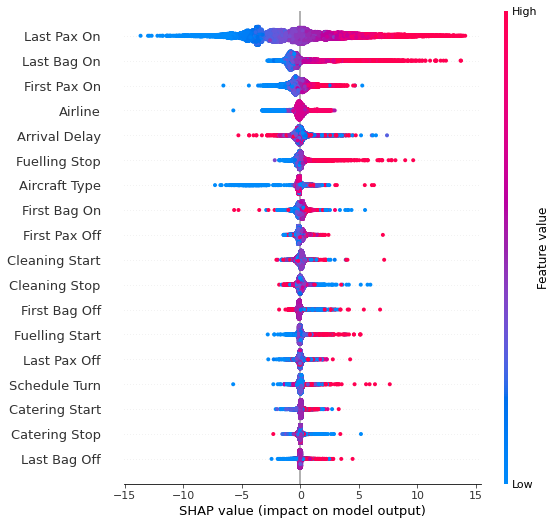

In [16]:
shap.summary_plot(shap_values, X_train) #class_names=model.classes_

In [17]:
import math
math.sqrt(25.884865)

5.087717071536113

In [18]:
math.sqrt(22.219778)

4.7137859518650185

In [19]:
math.sqrt(21.682981)

4.656498792011011